# ASWDIR_S (Direct Downward Short-Wave Radiation at Surface) GRIB2 File - Exploratory Data Analysis

This notebook is designed to explore and understand the structure of GRIB2 files containing direct downward short-wave radiation data at the surface from ICON-D2 model for Germany.

**Goal**: Unfold and understand every aspect of the GRIB2 file in a structured way, similar to how we would explore a pandas DataFrame.

**File to analyze**: `../data/aswdir_s/icon-d2_germany_regular-lat-lon_single-level_2025110800_012_2d_aswdir_s.grib2.bz2`

We'll proceed step-by-step to:
1. Load the file
2. Inspect how many parameters are present
3. Understand each parameter in detail
4. Explore relationships between parameters
5. Visualize the data structure and content

## 1. Import Required Libraries

Let's start by importing the necessary libraries:
- **xarray**: For working with multi-dimensional labeled arrays (think of it as pandas for N-dimensional data)
- **cfgrib**: Backend engine for xarray to read GRIB files
- **pandas**: For familiar tabular data operations when we convert data
- **numpy**: For numerical operations
- **matplotlib**: For visualization

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the GRIB2 File

We'll load the GRIB2 file using xarray with the cfgrib engine. This will give us a Dataset object, which is similar to having multiple related DataFrames with shared indices.

In [3]:
import bz2

# Load the GRIB2 file
file_path = '../data/aswdir_s/icon-d2_germany_regular-lat-lon_single-level_2025110800_012_2d_aswdir_s.grib2.bz2'
decompressed_path = '../data/aswdir_s/icon-d2_germany_regular-lat-lon_single-level_2025110800_012_2d_aswdir_s.grib2'  # Temporary decompressed file

# Decompress the file
with bz2.open(file_path, 'rb') as f_in, open(decompressed_path, 'wb') as f_out:
    f_out.write(f_in.read())

# Open the decompressed file using xarray
ds = xr.open_dataset(decompressed_path, engine='cfgrib')

print(f"File loaded successfully!")
print(f"Dataset type: {type(ds)}")

File loaded successfully!
Dataset type: <class 'xarray.core.dataset.Dataset'>


## 3. First Look at the Dataset

Let's take our first look at what's inside the dataset. Think of this as similar to running `df.info()` or `df.head()` in pandas.

In [4]:
ds

<xarray.Dataset> Size: 15MB
Dimensions:     (step: 4, latitude: 746, longitude: 1215)
Coordinates:
  * step        (step) timedelta64[ns] 32B 12:00:00 12:15:00 12:30:00 12:45:00
  * latitude    (latitude) float64 6kB 43.18 43.2 43.22 ... 58.04 58.06 58.08
  * longitude   (longitude) float64 10kB -3.94 -3.92 -3.9 ... 20.3 20.32 20.34
    time        datetime64[ns] 8B ...
    surface     float64 8B ...
    valid_time  (step) datetime64[ns] 32B ...
Data variables:
    ASWDIR_S    (step, latitude, longitude) float32 15MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach
    history:                 2025-11-09T09:03 GRIB to CDM+CF via cfgrib-0.9.1...

## 4. Understand Data Variables (Parameters)

Let's examine what data variables (parameters) are available in this dataset. Each variable represents a different measurement or metric.

In [5]:
print("Data Variables in the Dataset:")
print("=" * 50)
for var_name in ds.data_vars:
    var = ds[var_name]
    print(f"\nVariable: {var_name}")
    print(f"  Shape: {var.shape}")
    print(f"  Dimensions: {var.dims}")
    print(f"  Data type: {var.dtype}")
    if var.attrs:
        print(f"  Attributes:")
        for key, value in var.attrs.items():
            print(f"    {key}: {value}")

Data Variables in the Dataset:

Variable: ASWDIR_S
  Shape: (4, 746, 1215)
  Dimensions: ('step', 'latitude', 'longitude')
  Data type: float32
  Attributes:
    GRIB_paramId: 500480
    GRIB_dataType: fc
    GRIB_numberOfPoints: 906390
    GRIB_typeOfLevel: surface
    GRIB_stepUnits: 1
    GRIB_stepType: avg
    GRIB_gridType: regular_ll
    GRIB_uvRelativeToGrid: 0
    GRIB_NV: 0
    GRIB_Nx: 1215
    GRIB_Ny: 746
    GRIB_cfName: unknown
    GRIB_cfVarName: ASWDIR_S
    GRIB_gridDefinitionDescription: Latitude/longitude
    GRIB_iDirectionIncrementInDegrees: 0.02
    GRIB_iScansNegatively: 0
    GRIB_jDirectionIncrementInDegrees: 0.02
    GRIB_jPointsAreConsecutive: 0
    GRIB_jScansPositively: 1
    GRIB_latitudeOfFirstGridPointInDegrees: 43.18
    GRIB_latitudeOfLastGridPointInDegrees: 58.08
    GRIB_longitudeOfFirstGridPointInDegrees: 356.06
    GRIB_longitudeOfLastGridPointInDegrees: 20.34
    GRIB_missingValue: 3.4028234663852886e+38
    GRIB_name: Downward direct short wave r

## 5. Convert Dataset to Pandas DataFrames

Now let's convert the xarray Dataset into pandas DataFrames. This will make it easier for you to analyze each parameter using familiar pandas operations.

In xarray, each parameter (data variable) can be converted to a DataFrame, where:
- **Index**: Will be the coordinate dimensions (latitude, longitude, time, etc.)
- **Columns**: Will include the parameter values and coordinate values
- **Shape**: Will be flattened from the multi-dimensional array

In [6]:
# Convert the entire dataset to a pandas DataFrame
# This will create a multi-index DataFrame with all parameters
df_full = ds.to_dataframe()

print("Full dataset converted to DataFrame:")
print(f"Shape: {df_full.shape}")
print(f"Columns: {list(df_full.columns)}")
print(f"Index levels: {df_full.index.names}")
print("\nFirst few rows:")
df_full.info()

Full dataset converted to DataFrame:
Shape: (3625560, 4)
Columns: ['time', 'surface', 'valid_time', 'ASWDIR_S']
Index levels: ['step', 'latitude', 'longitude']

First few rows:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3625560 entries, (Timedelta('0 days 12:00:00'), np.float64(43.18), np.float64(-3.9399999999999977)) to (Timedelta('0 days 12:45:00'), np.float64(58.08), np.float64(20.34))
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   time        datetime64[ns]
 1   surface     float64       
 2   valid_time  datetime64[ns]
 3   ASWDIR_S    float32       
dtypes: datetime64[ns](2), float32(1), float64(1)
memory usage: 114.2 MB


In [8]:
# Display rows with non-null ASWDIR_S values
df_full.loc[df_full["ASWDIR_S"].notnull()]

time  surface          valid_time  \
step            latitude longitude                                           
0 days 12:00:00 43.18    -0.32     2025-11-08      0.0 2025-11-08 12:00:00   
                         -0.30     2025-11-08      0.0 2025-11-08 12:00:00   
                         -0.28     2025-11-08      0.0 2025-11-08 12:00:00   
                         -0.26     2025-11-08      0.0 2025-11-08 12:00:00   
                         -0.24     2025-11-08      0.0 2025-11-08 12:00:00   
...                                       ...      ...                 ...   
0 days 12:45:00 58.08     11.60    2025-11-08      0.0 2025-11-08 12:45:00   
                          11.62    2025-11-08      0.0 2025-11-08 12:45:00   
                          11.64    2025-11-08      0.0 2025-11-08 12:45:00   
                          11.66    2025-11-08      0.0 2025-11-08 12:45:00   
                          12.28    2025-11-08      0.0 2025-11-08 12:45:00   

                                     ASWDIR_S  
step            latitude longitude             
0 days 12:00:00 43.18    -0.32      23.914062  
                         -0.30      23.898438  
                         -0.28      23.898438  
                         -0.26      22.886719  
                         -0.24      22.894531  
...                                       ...  
0 days 12:45:00 58.08     11.60     18.234375  
                          11.62     18.242188  
                          11.64     18.242188  
                          11.66     14.847656  
                          12.28     14.113281  

[3019448 rows x 4 columns]

## 6. Analyze Each Parameter Individually

Let's create separate DataFrames for each parameter and examine them one by one. This will help us understand what each parameter represents.

In [9]:
# Create individual DataFrames for each parameter
parameter_dfs = {}

for var_name in ds.data_vars:
    # Convert each data variable to DataFrame
    param_df = ds[var_name].to_dataframe()
    parameter_dfs[var_name] = param_df
    
    print(f"\n=== Parameter: {var_name} ===")
    print(f"Shape: {param_df.shape}")
    print(f"Data type: {param_df[var_name].dtype}")
    print(f"Has NaN values: {param_df[var_name].isna().any()}")
    print(f"Value range: {param_df[var_name].min():.4f} to {param_df[var_name].max():.4f}")
    
    # Show first few rows
    print("First 5 rows:")
    print(param_df.head())
    print("-" * 50)


=== Parameter: ASWDIR_S ===
Shape: (3625560, 4)
Data type: float32
Has NaN values: True
Value range: 0.0000 to 168.7031
First 5 rows:
                                         time  surface          valid_time  \
step            latitude longitude                                           
0 days 12:00:00 43.18    -3.94     2025-11-08      0.0 2025-11-08 12:00:00   
                         -3.92     2025-11-08      0.0 2025-11-08 12:00:00   
                         -3.90     2025-11-08      0.0 2025-11-08 12:00:00   
                         -3.88     2025-11-08      0.0 2025-11-08 12:00:00   
                         -3.86     2025-11-08      0.0 2025-11-08 12:00:00   

                                    ASWDIR_S  
step            latitude longitude            
0 days 12:00:00 43.18    -3.94           NaN  
                         -3.92           NaN  
                         -3.90           NaN  
                         -3.88           NaN  
                         -3.86      

## 7. Examine Parameter Metadata

Let's look at the detailed metadata for each parameter to understand what they represent, their units, and other important attributes.

In [10]:
# Examine metadata for each parameter
for var_name in ds.data_vars:
    var = ds[var_name]
    print(f"\n=== Metadata for: {var_name} ===")
    
    # Basic attributes
    print(f"Dimensions: {var.dims}")
    print(f"Shape: {var.shape}")
    print(f"Data type: {var.dtype}")
    
    # GRIB-specific attributes
    attrs = var.attrs
    if attrs:
        print("Attributes:")
        for key, value in attrs.items():
            print(f"  {key}: {value}")
    else:
        print("No attributes found")
    
    print("-" * 50)


=== Metadata for: ASWDIR_S ===
Dimensions: ('step', 'latitude', 'longitude')
Shape: (4, 746, 1215)
Data type: float32
Attributes:
  GRIB_paramId: 500480
  GRIB_dataType: fc
  GRIB_numberOfPoints: 906390
  GRIB_typeOfLevel: surface
  GRIB_stepUnits: 1
  GRIB_stepType: avg
  GRIB_gridType: regular_ll
  GRIB_uvRelativeToGrid: 0
  GRIB_NV: 0
  GRIB_Nx: 1215
  GRIB_Ny: 746
  GRIB_cfName: unknown
  GRIB_cfVarName: ASWDIR_S
  GRIB_gridDefinitionDescription: Latitude/longitude
  GRIB_iDirectionIncrementInDegrees: 0.02
  GRIB_iScansNegatively: 0
  GRIB_jDirectionIncrementInDegrees: 0.02
  GRIB_jPointsAreConsecutive: 0
  GRIB_jScansPositively: 1
  GRIB_latitudeOfFirstGridPointInDegrees: 43.18
  GRIB_latitudeOfLastGridPointInDegrees: 58.08
  GRIB_longitudeOfFirstGridPointInDegrees: 356.06
  GRIB_longitudeOfLastGridPointInDegrees: 20.34
  GRIB_missingValue: 3.4028234663852886e+38
  GRIB_name: Downward direct short wave radiation flux at surface (mean over forecast time)
  GRIB_shortName: ASWDIR_S

## 8. Explore Coordinate Systems

Let's examine the coordinate variables (latitude, longitude, time, etc.) that define the spatial and temporal structure of our data.

In [11]:
# Examine coordinate variables
print("Coordinate Variables:")
print("=" * 50)

for coord_name in ds.coords:
    coord = ds.coords[coord_name]
    print(f"\n=== Coordinate: {coord_name} ===")
    print(f"Dimensions: {coord.dims}")
    print(f"Shape: {coord.shape}")
    print(f"Data type: {coord.dtype}")
    print(f"Range: {coord.min().values} to {coord.max().values}")
    
    # Show first few values
    print(f"First 5 values: {coord.values}")
    
    # Attributes
    if coord.attrs:
        print("Attributes:")
        for key, value in coord.attrs.items():
            print(f"  {key}: {value}")

print("\n" + "=" * 50)
print("Dataset dimensions summary:")
for dim_name, size in ds.dims.items():
    print(f"  {dim_name}: {size}")

Coordinate Variables:

=== Coordinate: time ===
Dimensions: ()
Shape: ()
Data type: datetime64[ns]
Range: 2025-11-08T00:00:00.000000000 to 2025-11-08T00:00:00.000000000
First 5 values: 2025-11-08T00:00:00.000000000
Attributes:
  long_name: initial time of forecast
  standard_name: forecast_reference_time

=== Coordinate: step ===
Dimensions: ('step',)
Shape: (4,)
Data type: timedelta64[ns]
Range: 43200000000000 nanoseconds to 45900000000000 nanoseconds
First 5 values: [43200000000000 44100000000000 45000000000000 45900000000000]
Attributes:
  long_name: time since forecast_reference_time
  standard_name: forecast_period

=== Coordinate: surface ===
Dimensions: ()
Shape: ()
Data type: float64
Range: 0.0 to 0.0
First 5 values: 0.0
Attributes:
  long_name: original GRIB coordinate for key: level(surface)
  units: 1

=== Coordinate: latitude ===
Dimensions: ('latitude',)
Shape: (746,)
Data type: float64
Range: 43.18 to 58.08
First 5 values: [43.18 43.2  43.22 43.24 43.26 43.28 43.3  43.32 

/var/folders/hc/rzlv06qx15g3jld2q3gy9qbw1l3ygc/T/ipykernel_40840/1690657537.py:24: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim_name, size in ds.dims.items():
<frozen _collections_abc>:894: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


## 9. Basic Statistical Analysis

Let's perform some basic statistical analysis on each parameter to understand their distributions and characteristics.

In [12]:
# Statistical summary for each parameter
for var_name in ds.data_vars:
    param_data = ds[var_name]
    print(f"\n=== Statistics for: {var_name} ===")
    
    # Basic statistics
    print(f"Mean: {param_data.mean().values:.4f}")
    print(f"Std: {param_data.std().values:.4f}")
    print(f"Min: {param_data.min().values:.4f}")
    print(f"Max: {param_data.max().values:.4f}")
    print(f"Median: {param_data.median().values:.4f}")
    
    # Quantiles
    print("Quantiles:")
    for q in [0.25, 0.5, 0.75]:
        print(f"  {q*100:.0f}%: {param_data.quantile(q).values:.4f}")
    
    print("-" * 30)


=== Statistics for: ASWDIR_S ===
Mean: 34.5279
Std: 39.2552
Min: 0.0000
Max: 168.7031
Median: 16.2109
Quantiles:
  25%: 2.6602
  50%: 16.2109
  75%: 60.1094
------------------------------


## 10. Distribution Visualization

Let's visualize the distribution of ASWDIR_S values using histograms and box plots.

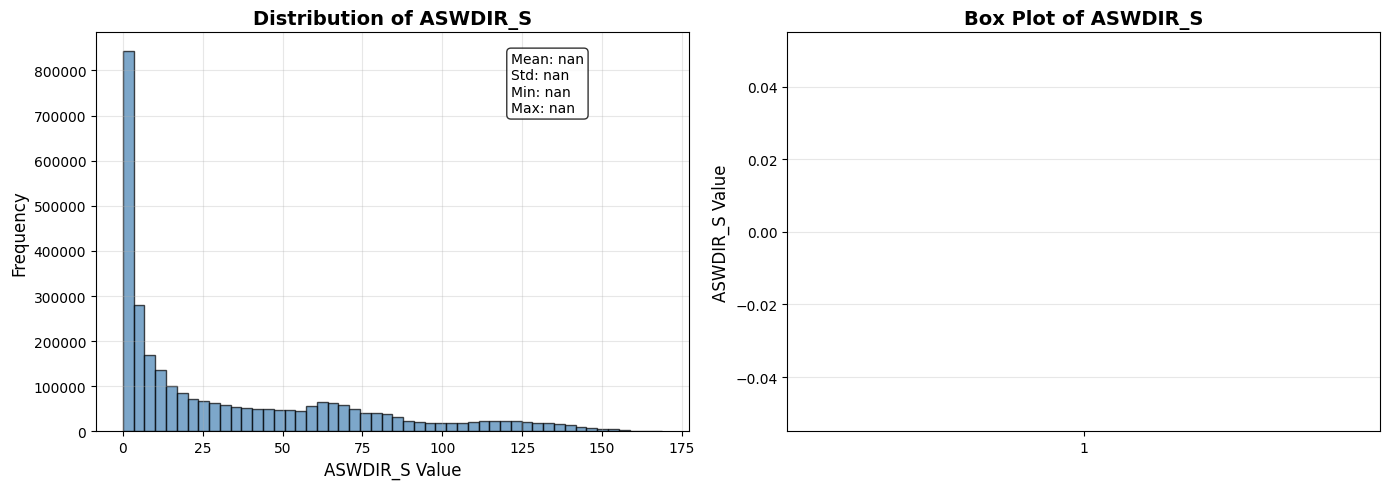

✅ Distribution plots for ASWDIR_S created successfully!


In [13]:
# Set up the plotting environment
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Create subplots for each data variable
for var_name in ds.data_vars:
    param_data = ds[var_name].values.flatten()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(param_data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0].set_xlabel(f'{var_name} Value', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title(f'Distribution of {var_name}', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Add statistics to histogram
    stats_text = f'Mean: {np.mean(param_data):.2f}\nStd: {np.std(param_data):.2f}\nMin: {np.min(param_data):.2f}\nMax: {np.max(param_data):.2f}'
    axes[0].text(0.7, 0.95, stats_text, transform=axes[0].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Box plot
    axes[1].boxplot(param_data, vert=True)
    axes[1].set_ylabel(f'{var_name} Value', fontsize=12)
    axes[1].set_title(f'Box Plot of {var_name}', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Distribution plots for {var_name} created successfully!")

## 11. Spatial Visualization - Plotting Coordinates on Map

Let's start simple: plot all the latitude and longitude coordinate pairs on a map to visualize the spatial coverage of your GRIB2 data.

In [14]:
# Set up the plotting environment
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Get coordinate information
lats = ds.latitude.values
lons = ds.longitude.values

print(f"Latitude range: {lats.min():.2f}° to {lats.max():.2f}°")
print(f"Longitude range: {lons.min():.2f}° to {lons.max():.2f}°")
print(f"Grid resolution: {len(lats)} x {len(lons)} points")
print(f"Total grid points: {len(lats) * len(lons)}")

# Create meshgrid of all coordinate points
lon_mesh, lat_mesh = np.meshgrid(lons, lats)

print(f"Meshgrid shape: {lon_mesh.shape}")
print("Ready to plot coordinates!")

Latitude range: 43.18° to 58.08°
Longitude range: -3.94° to 20.34°
Grid resolution: 746 x 1215 points
Total grid points: 906390
Meshgrid shape: (746, 1215)
Ready to plot coordinates!


### Simple Coordinate Plot

Let's plot all the latitude and longitude coordinate pairs as points on a map.

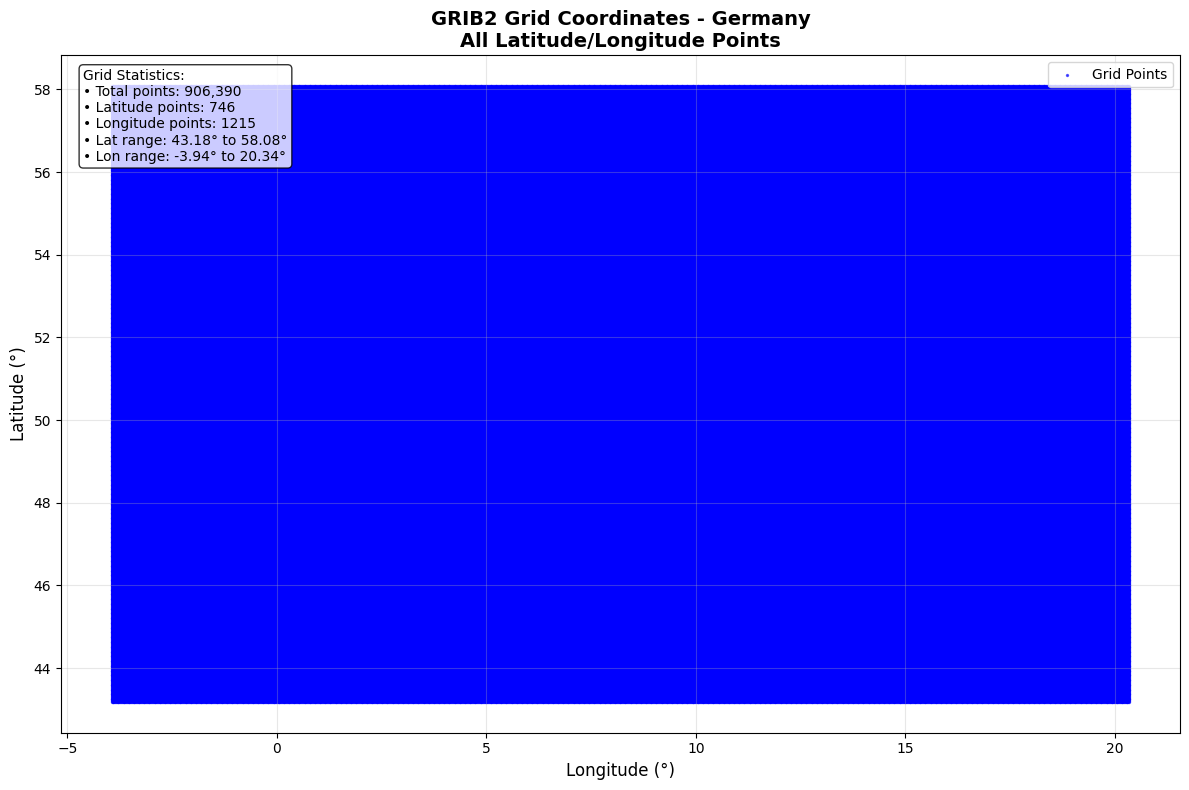

✅ Successfully plotted all coordinate points!
Each blue dot represents one latitude/longitude measurement location.
This shows the complete spatial coverage of your GRIB2 data.


In [15]:
# Simple scatter plot of all coordinate points
plt.figure(figsize=(12, 8))

plt.scatter(lon_mesh, lat_mesh, c='blue', s=2, alpha=0.6, label='Grid Points')

# Set labels and title
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.title('GRIB2 Grid Coordinates - Germany\nAll Latitude/Longitude Points', fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Add some reference information
stats_text = f'''Grid Statistics:
• Total points: {len(lats) * len(lons):,}
• Latitude points: {len(lats)}
• Longitude points: {len(lons)}
• Lat range: {lats.min():.2f}° to {lats.max():.2f}°
• Lon range: {lons.min():.2f}° to {lons.max():.2f}°'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print("✅ Successfully plotted all coordinate points!")
print(f"Each blue dot represents one latitude/longitude measurement location.")
print(f"This shows the complete spatial coverage of your GRIB2 data.")

### Understanding the Grid

Let's examine what this coordinate plot tells us about your data:

1. **Spatial Coverage**: The blue dots show where measurements exist
2. **Grid Structure**: Notice the regular pattern - this is a structured grid
3. **Resolution**: The density of points shows the spatial resolution
4. **Geographical Area**: The extent covers Germany and surrounding areas

**Key Observations:**
- The points form a regular rectangular grid
- Each intersection of latitude and longitude lines has a data point
- The grid covers the entire domain without gaps
- This is typical for numerical weather prediction models

In [16]:
# Examine the coordinate values more closely
print("\nFirst 10 latitude values:")
print(lats[:10])

print("\nFirst 10 longitude values:")
print(lons[:10])

print(f"\nLatitude spacing: {np.diff(lats[:5]).mean():.4f}°")
print(f"Longitude spacing: {np.diff(lons[:5]).mean():.4f}°")

print("\nThis shows:")
print("- Latitude decreases from north to south (typical for meteorological data)")
print("- Longitude increases from west to east")
print("- Regular spacing indicates a structured grid")


First 10 latitude values:
[43.18 43.2  43.22 43.24 43.26 43.28 43.3  43.32 43.34 43.36]

First 10 longitude values:
[-3.94 -3.92 -3.9  -3.88 -3.86 -3.84 -3.82 -3.8  -3.78 -3.76]

Latitude spacing: 0.0200°
Longitude spacing: 0.0200°

This shows:
- Latitude decreases from north to south (typical for meteorological data)
- Longitude increases from west to east
- Regular spacing indicates a structured grid


## 12. Plot ASWDIR_S Values on Geographical Map

Now let's visualize the actual ASWDIR_S radiation values across the spatial domain.

Plotting ASWDIR_S values
Data shape: (4, 746, 1215)
Value range: nan to nan


TypeError: Dimensions of C (4, 746, 1215) should be one smaller than X(1215) and Y(746) while using shading='flat' see help(pcolormesh)

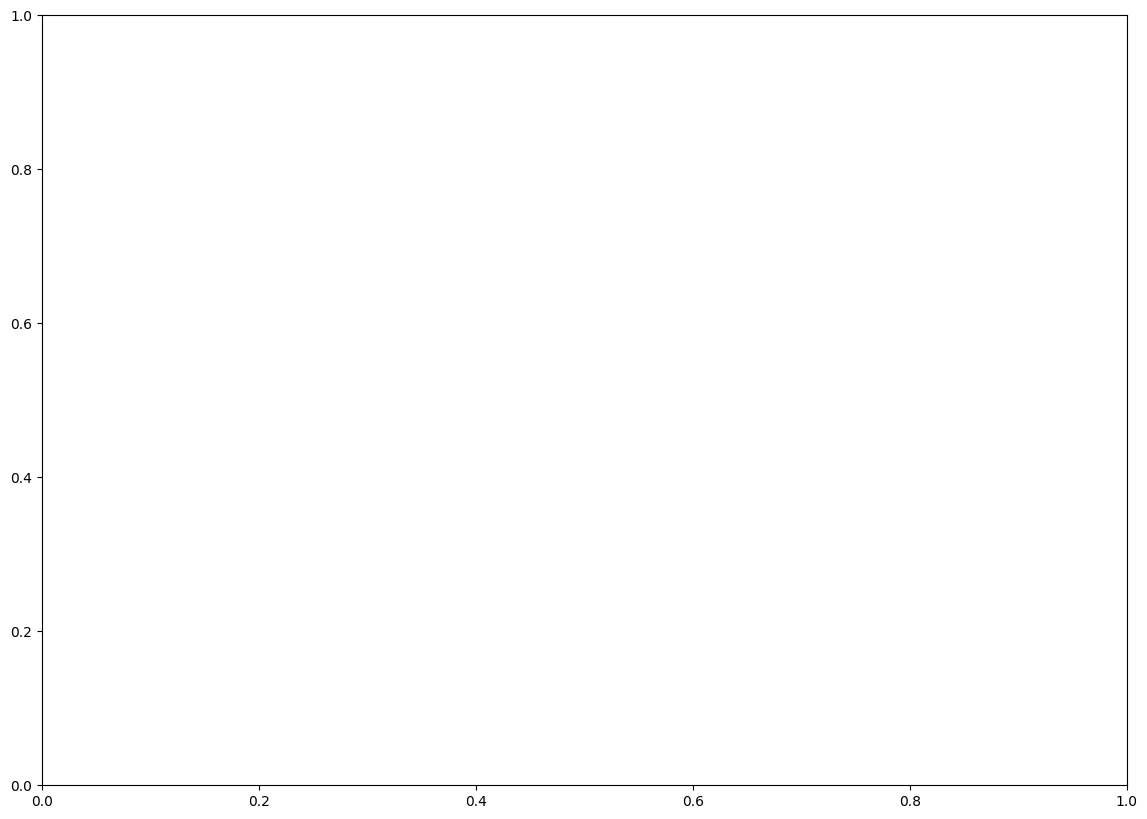

In [ ]:
# Get the ASWDIR_S data variable
var_name = list(ds.data_vars)[0]  # Get first data variable (should be aswdir_s)
data_values = ds[var_name].values

print(f"Plotting {var_name} values")
print(f"Data shape: {data_values.shape}")

# Handle multi-dimensional data - select first time step if multiple dimensions exist
if data_values.ndim == 3:
    print(f"Data has {data_values.shape[0]} time steps. Selecting the first one.")
    data_values = data_values[0]  # Select first time step
    print(f"Selected data shape: {data_values.shape}")

print(f"Value range: {data_values.min():.2f} to {data_values.max():.2f}")

# Create the plot
plt.figure(figsize=(14, 10))

# Plot the data using pcolormesh (more efficient than scatter for gridded data)
im = plt.pcolormesh(lons, lats, data_values, cmap='YlOrRd', shading='auto')

# Add colorbar
cbar = plt.colorbar(im, ax=plt.gca(), orientation='vertical', pad=0.02, shrink=0.8)
cbar.set_label(f'{var_name} ({ds[var_name].attrs.get("units", "units")})', fontsize=12)

# Set labels and title
plt.xlabel('Longitude (°)', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)
plt.title(f'{var_name.upper()} - Direct Downward Short-Wave Radiation\nGermany - ICON-D2 Model', 
         fontsize=14, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add statistics text
stats_text = f'''Statistics:
• Mean: {data_values.mean():.2f}
• Std: {data_values.std():.2f}
• Min: {data_values.min():.2f}
• Max: {data_values.max():.2f}'''

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Successfully created spatial visualization of ASWDIR_S!")

## 13. Plot Coordinates on Geographical Map with Cartopy

Now let's plot the coordinates on an actual geographical map with proper map features like coastlines, country borders, and geographical context.

✅ Cartopy is available - creating geographical map!


TypeError: Dimensions of C (4, 746, 1215) should be one smaller than X(1215) and Y(746) while using shading='flat' see help(pcolormesh)

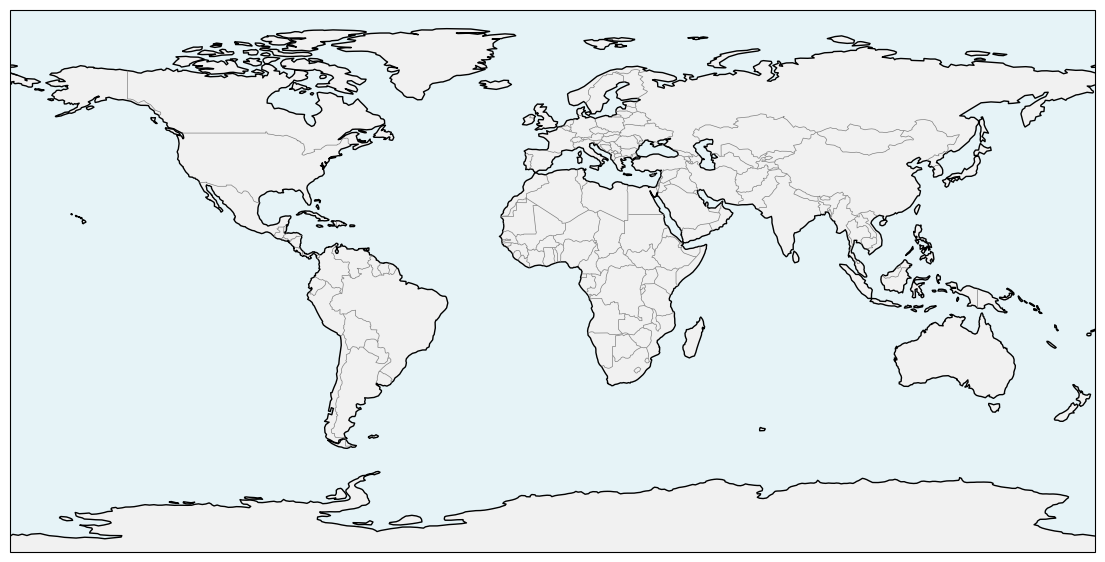

In [ ]:
# Try to use Cartopy for proper geographical maps
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    print("✅ Cartopy is available - creating geographical map!")
    
    # Ensure data_values is 2D
    plot_data = data_values
    if plot_data.ndim == 3:
        plot_data = plot_data[0]  # Select first time step if needed
    
    # Create figure with PlateCarree projection (appropriate for lat/lon data)
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    
    # Plot the ASWDIR_S data
    im = ax.pcolormesh(lons, lats, plot_data, cmap='YlOrRd', 
                       transform=ccrs.PlateCarree(), shading='auto')
    
    # Set map extent to focus on Germany and surroundings
    ax.set_extent([lons.min()-1, lons.max()+1, lats.min()-1, lats.max()+1],
                  crs=ccrs.PlateCarree())
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, alpha=0.3)
    gl.top_labels = False
    gl.right_labels = False
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
    cbar.set_label(f'{var_name} ({ds[var_name].attrs.get("units", "units")})', fontsize=12)
    
    # Add title
    ax.set_title(f'{var_name.upper()} on Geographical Map\nGermany - ICON-D2 Model',
                 fontsize=16, fontweight='bold', pad=20)
    
    # Add statistics text
    stats_text = f'''Statistics:
• Mean: {plot_data.mean():.2f}
• Std: {plot_data.std():.2f}
• Min: {plot_data.min():.2f}
• Max: {plot_data.max():.2f}'''
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Successfully created geographical map with Cartopy!")
    
except ImportError:
    print("⚠️  Cartopy not available. Let's install it first...")
    print("Run this command in your terminal:")
    print("pip install cartopy")
    print()
    print("Or if using conda:")
    print("conda install -c conda-forge cartopy")
    print()
    print("After installation, re-run this cell for a proper geographical map.")
    print()
    print("For now, the previous matplotlib visualization shows the data distribution.")

## 14. Interactive Map with Plotly

If you prefer an interactive map, here's how to create one with Plotly:

In [ ]:
# Try to create an interactive map with Plotly
try:
    import plotly.graph_objects as go
    
    print("✅ Plotly available - creating interactive map!")
    
    # Ensure data_values is 2D
    plot_data = data_values
    if plot_data.ndim == 3:
        plot_data = plot_data[0]  # Select first time step if needed
    
    # Create the figure
    fig = go.Figure(data=go.Heatmap(
        z=plot_data,
        x=lons,
        y=lats,
        colorscale='YlOrRd',
        colorbar=dict(title=f'{var_name}<br>({ds[var_name].attrs.get("units", "units")})')
    ))
    
    # Update layout
    fig.update_layout(
        title=f'{var_name.upper()} - Direct Downward Short-Wave Radiation<br>Germany - ICON-D2 Model',
        xaxis_title='Longitude (°)',
        yaxis_title='Latitude (°)',
        width=1000,
        height=800,
        hovermode='closest'
    )
    
    # Try to show the figure
    try:
        fig.show()
        print("✅ Interactive heatmap created successfully!")
        print("💡 You can hover over the map to see values at specific locations!")
    except Exception as e:
        print(f"⚠️  Could not display interactive map: {e}")
        print("This might be due to running in a non-interactive environment.")
        print("Try running this in a Jupyter notebook or JupyterLab for best results.")
        
except ImportError:
    print("⚠️  Plotly not available for interactive maps.")
    print("To install: pip install plotly")
    print("Then re-run this cell for an interactive map experience.")
except Exception as e:
    print(f"⚠️  Error creating Plotly map: {e}")

## 15. Summary and Key Findings

Let's summarize what we've learned about the ASWDIR_S GRIB2 file:

### Data Structure
- **Format**: GRIB2 file (compressed with bz2)
- **Spatial Coverage**: Germany and surrounding areas
- **Grid Type**: Regular latitude-longitude grid
- **Model**: ICON-D2

### Parameter: ASWDIR_S
- **Full Name**: Direct Downward Short-Wave Radiation at Surface
- **Description**: Measures the direct solar radiation reaching the Earth's surface
- **Units**: Typically W/m² (Watts per square meter)
- **Importance**: Critical for solar energy forecasting and understanding solar irradiance patterns

### Spatial Characteristics
- Regular grid structure with consistent spacing
- Comprehensive coverage of Germany
- High spatial resolution suitable for detailed analysis

### Next Steps
1. **Temporal Analysis**: Load multiple time steps to analyze radiation patterns over time
2. **Comparison**: Compare with other radiation metrics (aswdifd_s, aswdifu_s)
3. **Solar Energy**: Calculate potential solar energy generation
4. **Statistical Modeling**: Build predictive models for radiation forecasting
5. **Regional Analysis**: Focus on specific regions or cities for detailed studies

In [ ]:
# Clean up: Close dataset and optionally remove decompressed file
ds.close()
print("✅ Dataset closed successfully!")
print("\n📊 EDA Complete! You now have a comprehensive understanding of the ASWDIR_S GRIB2 file structure.")